# SIRASD Model
## Susceptible Infected Recovered for Asymptomatic-Symptomatic and Dead

**N** = S + E + Is + Ia + Rs + Ra + D (população total)

**S** = Suscetíveis

**E** = Expostos
 
**Is** = Infectados sintomáticos

**Ia** = Infectados assintomáticos

**Rs** = Recuperados de infecção sintomática

**Ra** = Recuperados de infecção assintomática

**D** = Mortos



**p** = proporção de que indivíduos apresentam/desenvolvem sintomas

**ε (épsilon)** = tempo de incubação até 1 exposto se transformar em 1 infectado

**ρ (rho)** = taxa de mortalidade para infectados antes de se recuperar

**βa (beta)** = taxa de infecção dos assintomáticos.

**βs (beta)** = taxa de infecção dos sintomáticos.

**γa (gamma)** = taxa de recuperação dos assintomáticos.

**γa (gamma)** = taxa de recuperação dos sintomáticos.

In [38]:
# Suscetíveis
def fs(N, beta_a, beta_s, Ia, Is, S):
    fs = -((beta_a*Ia + beta_s*Is)*S)/N
    return fs

# Infectados assintomáticos
def fia(N, beta_a, beta_s, Ia, Is, S, p, gamma_a):
    fia = ((1-p)*(beta_a*Ia + beta_s*Is)*S)/N - gamma_a*Ia
    return fia

# Infectados sintomáticos
def fis(N, beta_a, beta_s, Ia, Is, S, p, gamma_s, rho):
    fis = (p*(beta_a*Ia + beta_s*Is)*S)/N - (gamma_s*Is)/(1-rho)
    return fis

# Recuperados assintomáticos
def fra(gamma_a, Ia):
    fra = gamma_a*Ia
    return fra

# Recuperados sintomáticos
def frs(gamma_s, Is):
    frs = gamma_s*Is
    return frs

# Mortos
def fd(rho, gamma_s, Is):
    fd = (rho*gamma_s*Is)/(1-rho)
    return fd

In [39]:
# Runge-Kutta 4° ordem para 6 dimensões (S, Ia, Is, Ra, Rs, D)
def rK4(N, S, Ia, Is, Ra, Rs, D, beta_a, beta_s, gamma_a, gamma_s, p, rho, hs):
    s1 = fs(N, beta_a, beta_s, Ia, Is, S)*hs
    ia1 = fia(N, beta_a, beta_s, Ia, Is, S, p, gamma_a)*hs
    is1 = fis(N, beta_a, beta_s, Ia, Is, S, p, gamma_s, rho)*hs
    ra1 = fra(gamma_a, Ia)*hs
    rs1 = frs(gamma_s, Is)*hs
    d1 = fd(rho, gamma_s, Is)*hs
    
    sk = S + s1*0.5
    iak = Ia + ia1*0.5
    isk = Is + is1*0.5
    rak = Ra + ra1*0.5
    rsk = Rs + rs1*0.5
    dk = D + d1*0.5
    
    s2 = fs(N, beta_a, beta_s, iak, isk, S)*hs
    ia2 = fia(N, beta_a, beta_s, iak, isk, S, p, gamma_a)*hs
    is2 = fis(N, beta_a, beta_s, iak, isk, S, p, gamma_s, rho)*hs
    ra2 = fra(gamma_a, iak)*hs
    rs2 = frs(gamma_s, isk)*hs
    d2 = fd(rho, gamma_s, isk)*hs
    
    sk = S + s2*0.5
    iak = Ia + ia2*0.5
    isk = Is + is2*0.5
    rak = Ra + ra2*0.5
    rsk = Rs + rs2*0.5
    dk = D + d2*0.5
    
    s3 = fs(N, beta_a, beta_s, iak, isk, S)*hs
    ia3 = fia(N, beta_a, beta_s, iak, isk, S, p, gamma_a)*hs
    is3 = fis(N, beta_a, beta_s, iak, isk, S, p, gamma_s, rho)*hs
    ra3 = fra(gamma_a, iak)*hs
    rs3 = frs(gamma_s, isk)*hs
    d3 = fd(rho, gamma_s, isk)*hs
    
    sk = S + s3*0.5
    iak = Ia + ia3*0.5
    isk = Is + is3*0.5
    rak = Ra + ra3*0.5
    rsk = Rs + rs3*0.5
    dk = D + d3*0.5
    
    s4 = fs(N, beta_a, beta_s, iak, isk, S)*hs
    ia4 = fia(N, beta_a, beta_s, iak, isk, S, p, gamma_a)*hs
    is4 = fis(N, beta_a, beta_s, iak, isk, S, p, gamma_s, rho)*hs
    ra4 = fra(gamma_a, iak)*hs
    rs4 = frs(gamma_s, isk)*hs
    d4 = fd(rho, gamma_s, isk)*hs
    
    S = S + (s1 + 2*(s2 + s3) + s4)/6
    Ia = Ia + (ia1 + 2*(ia2 + ia3) + ia4)/6
    Is = Is + (is1 + 2*(is2 + is3) + is4)/6
    Ra = Ra + (ra1 + 2*(ra2 + ra3) + ra4)/6
    Rs = Rs + (rs1 + 2*(rs2 + rs3) + rs4)/6
    D = D + (d1 + 2*(d2 + d3) + d4)/6
    
    return S, Ia, Is, Ra, Rs, D    

In [62]:
#def SIRASD(): e talvez adicionar o fator Expostos E para ficar SEIRASD()
def SIRASD(N, beta_a0, beta_s0, beta_a, beta_s, gamma_a, gamma_s, p, rho, hs):
    
    
    # Initial condition
    S  = N - 1               #suscetivel
    Ia = 1                   #infectado assintomatico
    Is = 1                   #infectado sintomatico
    Ra = 0.                  #recuperado ass
    Rs = 0.                  #recuperado sin
    D  = 0.

    sus, infa, infs, reca, recs, deaths= [],[],[],[],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(S)
        infa.append(Ia)
        infs.append(Is)
        reca.append(Ra)
        recs.append(Rs)
        deaths.append(D)
        S, Ia, Is, Ra, Rs, D = rK4(N, S, Ia, Is, Ra, Rs, D, beta_a, beta_s, gamma_a, gamma_s, p, rho, hs)

    return sus, infa, infs, reca, recs, deaths

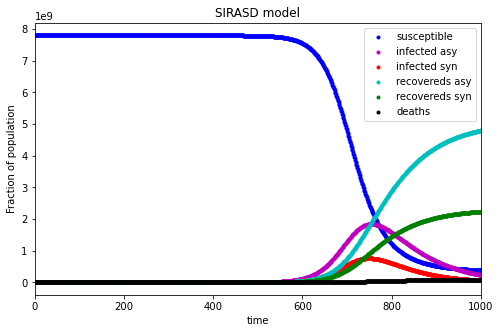

In [65]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib.pyplot import *
from scipy.integrate import odeint

# Parameters of the model
N = 7800*(10**6)
beta_a0 = 0.
beta_s0 = 0.
beta_a = 0.4417
beta_s = 0.4417
gamma_a = 0.1260
gamma_s = 0.1508
p = 0.3210
rho = 0.0347
hs = 0.1

S, Ia, Is, Ra, Rs, D = SIRASD(N, beta_a0, beta_s0, beta_a, beta_s, gamma_a, gamma_s, p, rho, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(S, 'b.', label='susceptible');
plt.plot(Ia, 'm.', label='infected asy');
plt.plot(Is, 'r.', label='infected syn');
plt.plot(Ra, 'c.', label='recovereds asy');
plt.plot(Rs, 'g.', label='recovereds syn');
plt.plot(D, 'k.', label='deaths');

plt.title("SIRASD model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,1000)
plt.show()